In [1]:
import sys
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Lib import *
%matplotlib inline

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
type2name = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

type: Ankle boot
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

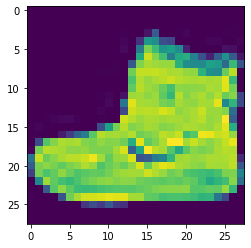

In [4]:
print('type:', transform(train_labels[0], dict=type2name))
print(train_images[0])
plt.imshow(train_images[0])

In [24]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.softmax),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') < 0.4:
            self.model.stop_training = True

model.fit(train_images, train_labels, epochs=50, callbacks=[callback()])

Epoch 1/50
1875/1875 [==============================] - 1s 525us/step - loss: 0.5414 - accuracy: 0.8000

In [44]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 416us/step - loss: 0.7385 - accuracy: 0.7856


[0.7384666800498962, 0.7856000065803528]

type: Pullover
[[3.8133057e-09 2.5090286e-14 7.3518942e-13 2.8368484e-12 3.9506637e-20
  1.0577736e-10 2.2599865e-08 7.3289699e-18 1.0000000e+00 3.1404981e-17]]
predict: Bag


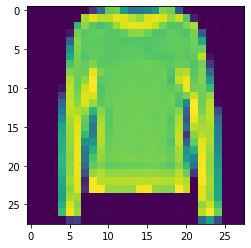

In [59]:
predictId = 99
print('type:', transform(test_labels[predictId], dict=type2name))
value = model.predict(np.array([train_images[predictId]]))
plt.imshow(test_images[predictId])